### Sample Code for Exercise 2

#### 1.1 Print * Pyramid

In [8]:
# input N
N = int(input())

for i in range(N): # 0,1,2,3,4...N
    # i start with 0
    print(('*'*(i+1)).center(40,' '))

                   *                    
                   **                   
                  ***                   
                  ****                  
                 *****                  
                 ******                 
                *******                 
                ********                
               *********                
               **********               


In [9]:
# The sample above seems not that symmetrical
N = int(input())

for i in range(N): # 0,1,2,3,4...N
    # i start with 0
    print(('*'*(2*i+1)).center(40,' '))

                   *                    
                  ***                   
                 *****                  
                *******                 
               *********                
              ***********               
             *************              
            ***************             
           *****************            
          *******************           


#### 1.2 Convert photos to symbols in ASCII

(300, 300, 3)


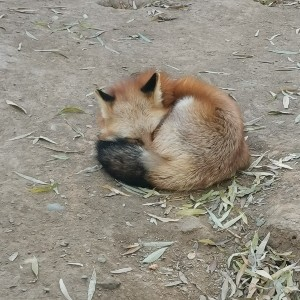

In [4]:
from PIL import Image
import numpy as np
photo =  Image.open('avatar.jpg')
print(np.array(photo).shape)
photo

(300, 300)


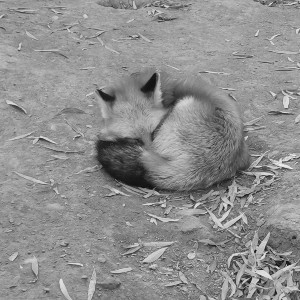

In [5]:
# convert RGB into grey pattern
photo = photo.convert('L')
photo_np = np.array(photo)
print(photo_np.shape)
photo

In [6]:
photo = photo.resize((int(1920/4),int(1080/4/1.5)))
photo_np = np.array(photo)
print(photo_np.shape)

(180, 480)


In [9]:
photo_np = 255 - photo_np

photo_np = photo_np**1.3
photo_np = (photo_np/photo_np.max()*255).astype(np.int64)

char_list = np.array([' ', '.', '-', '+', '=', '*', '#', '@'])

#char_list = 'B*oahkbdpqwZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,"^`\'. '

with open('Symbolic_Avatar.txt','w') as f:

    for i in (photo_np//(256/len(char_list))).astype(int):
        for j in i:
            try:
                f.write(char_list[j])
            except:
                print(j)
        f.write('\n')

    

#### 1.3 Print tree of directory

In [147]:
# From blog https://blog.csdn.net/xijuezhu8128/article/details/106115939

from pathlib import Path

tree_str = ''
def generate_tree(pathname, n=0):
    global tree_str
    if pathname.is_file():
        tree_str += '    |' * n + '-' * 4 + pathname.name + '\n'
    elif pathname.is_dir():
        tree_str += '    |' * n + '-' * 4 + \
            str(pathname.relative_to(pathname.parent)) + '\\' + '\n'
        for cp in pathname.iterdir():
            generate_tree(cp, n + 1)


path = '../automation/'    
generate_tree(Path(path), 0)
print(tree_str)


----automation\
    |----@AutomationLog.txt
    |----log.txt
    |----wehcat.ipynb



### process control

#### 2.1 find the prime number

In [12]:
# An example of Python code
import math 

ans = [2,]
for i in range(3,1001,2):
    flag = False
    for j in range(3,math.ceil(math.sqrt(i))+1):
        if i % j == 0:
            flag = True
            break
    if not flag:
        ans.append(i)        

print(ans)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


#### 2.2 Elevator control

In [15]:
UP = 1
DO_NOTHING = 0
DOWN = -1

state = UP
now_floor = 7

cmd_list = [(1,UP),(11,DOWN)]


def elevator_do(cmd_list,state,now_floor):
    if cmd_list == []:
        return DO_NOTHING
    
    if state == DO_NOTHING:
        if (cmd_list[0][0] < now_floor):
            return DOWN
        elif (cmd_list[0][0] > now_floor):
            return UP
        else:
            return cmd_list[0][1]

    # WWQ version
    # if state == UP and max([x[0] for x in cmd_list]) > now_floor:
    #     return UP
    # elif state == UP and max([x[0] for x in cmd_list]) < now_floor:
    #     return DOWN
    # elif state == DOWN and min([x[0] for x in cmd_list]) < now_floor:
    #     return DOWN
    # elif state == DOWN and min([x[0] for x in cmd_list]) > now_floor:
    #     return UP
    
    # reduce form
    if any([((x[0]- now_floor) * state)>0 for x in cmd_list if x[0] != now_floor]) :
        return state
    else:
        return state * -1


### string process

#### 3.1 sting reverse

In [17]:
s = '12345678'
print(s[::-1])

87654321


#### 3.2 word count

In [18]:
s = """* **Part 1: About Python**
  
  - What is Python?
    - Guido van Rossum and Monty Python -- "Monty Python's Flying Circus"
    - Interpreted Language (opposed to Compiled languages)
  - What can Python do?
    - Almost everything except giving you a baby -- Data Analysis, Web Spider, Office Automation ...
  - Why python?
    - Easy to read, pick up and integrate with other languages, Active community and Massive libraries
    - Everybody is using Python!
  - What is the difference between C++ and Python?
    - Compiled language VS. Interpreted language
    - Curly bracket VS. Indentation
    - Specified VS. Unspecified variable type"""

In [23]:
'part?'.isalpha()

False

In [38]:
# drop non alpha char
counter = {}
s = ''.join([x for x in s if x==' ' or x.isalpha()])
for word in [x for x in s.split(' ') if x]:
    word = word.lower()
    # if counter.get(word) == None:
    #     counter[word] = 0
    # counter[word] += 1
    counter[word] = counter.get(word,0) + 1

In [42]:
sorted(counter.items(),key=lambda x:x[1],reverse=True)

[('python', 7),
 ('and', 4),
 ('what', 3),
 ('is', 3),
 ('language', 3),
 ('vs', 3),
 ('monty', 2),
 ('interpreted', 2),
 ('to', 2),
 ('compiled', 2),
 ('languages', 2),
 ('part', 1),
 ('about', 1),
 ('guido', 1),
 ('van', 1),
 ('rossum', 1),
 ('pythons', 1),
 ('flying', 1),
 ('circus', 1),
 ('opposed', 1),
 ('can', 1),
 ('do', 1),
 ('almost', 1),
 ('everything', 1),
 ('except', 1),
 ('giving', 1),
 ('you', 1),
 ('a', 1),
 ('baby', 1),
 ('data', 1),
 ('analysis', 1),
 ('web', 1),
 ('spider', 1),
 ('office', 1),
 ('automation', 1),
 ('why', 1),
 ('easy', 1),
 ('read', 1),
 ('pick', 1),
 ('up', 1),
 ('integrate', 1),
 ('with', 1),
 ('other', 1),
 ('active', 1),
 ('community', 1),
 ('massive', 1),
 ('libraries', 1),
 ('everybody', 1),
 ('using', 1),
 ('the', 1),
 ('difference', 1),
 ('between', 1),
 ('c', 1),
 ('curly', 1),
 ('bracket', 1),
 ('indentation', 1),
 ('specified', 1),
 ('unspecified', 1),
 ('variable', 1),
 ('type', 1)]

#### 3.3 Wechat Automation

In [ ]:
#%run D:\python38\Scripts\Automation.py -t 5

In [ ]:

import uiautomation as uia
import os
import re
import pandas as pd

with open('log.txt','r',encoding='utf') as f:
    text = f.read()

def parse(s):
    
    if 'ClassName:' not in s:
        return None
    
    s = s.strip()
    di = {}
    idx = s.index('ClassName:')
    di['ControlType'] = s[s.index('ControlType:')+len('ControlType:'):idx].strip().replace('\'','')

    idx = s.index('AutomationId:')
    di['ClassName'] = s[s.index('ClassName:')+len('ClassName:'):idx].strip().replace('\'','')

    idx = s.index('Rect:')
    di['AutomationId'] = s[s.index('AutomationId:')+len('AutomationId:'):idx].strip().replace('\'','')

    idx = s.index(' Name:')
    di['Rect'] = s[s.index('Rect:')+len('Rect:'):idx].strip().replace('\'','')

    idx = s.index('Handle:')
    di['Name'] = s[s.index(' Name:')+len(' Name:'):idx].strip().replace('\'','')

    idx = s.index('Depth:')
    di['Handle'] = s[s.index('Handle:')+len('Handle:'):idx].strip().replace('\'','')

    idx = s.index(' ',s.index('Depth:')+len('Depth:')+1)
    di['Depth'] = int(s[s.index('Depth:')+len('Depth:'):idx].strip())

    return di

nodes = []
Depth_list = []

for line in text.split('\n'):
    s = parse(line)
    if s:
        idx = len(nodes)
        if len(Depth_list) == s['Depth']:
            Depth_list.append(idx)
            
            # parent node
            if len(Depth_list) == 1:
                s['parent'] = -1
            else:
                s['parent'] = Depth_list[-2]
                nodes[s['parent']]['children'].append(idx)
            
            s['children'] = []
        else:
            while len(Depth_list) > s['Depth']:
                Depth_list.pop()
            Depth_list.append(idx)
            # parent node
            if len(Depth_list) == 1:
                s['parent'] = -1
            else:
                s['parent'] = Depth_list[-2]    
            
            # child node
            nodes[s['parent']]['children'].append(idx)
            s['children'] = []

        nodes.append(s)

def search_name(name):
    return [x for x in nodes if x['Name']==name]


name_list = []
for idx in search_name('聊天成员')[0]['children']:
    name_list.append(nodes[idx]['Name'])
if '添加' in name_list:
    name_list.remove('添加')
if '移出' in name_list:
    name_list.remove('移出')